# intro to scikit-learn (sklearn)

![MLpng](ML.png)

# 0. Workflow

In [1]:
import pandas as pd
import numpy as np
heart= pd.read_csv("data/heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## 1. get the data ready

In [2]:
# x is feature matric
x = heart.drop("target",axis=1)

#y label/output
y= heart["target"]

## 2. choose the right model

In [3]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier()

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 3. fit the model to data

In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2)

In [5]:
clf.fit(x_train, y_train);

In [6]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
38,65,0,2,155,269,0,1,148,0,0.8,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
64,58,1,2,140,211,1,0,165,0,0.0,2,0,2
256,58,1,0,128,259,0,0,130,1,3.0,1,2,3
141,43,1,0,115,303,0,1,181,0,1.2,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2
94,45,0,1,112,160,0,1,138,0,0.0,1,0,2


In [7]:
# prediction
y_label=clf.predict(np.array([0,2,3,4]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y_preds= clf.predict(x_test)
y_preds

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

In [9]:
y_test

0      1
144    1
93     1
267    0
136    1
      ..
33     1
238    0
81     1
170    0
129    1
Name: target, Length: 61, dtype: int64

## 4. evaluate model

In [10]:
clf.score(x_train, y_train)

1.0

In [11]:
clf.score(x_test, y_test)

0.8360655737704918

In [12]:
from sklearn.metrics import *
#classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.83      0.92      0.87        37

    accuracy                           0.84        61
   macro avg       0.84      0.81      0.82        61
weighted avg       0.84      0.84      0.83        61



In [13]:
print(confusion_matrix(y_test, y_preds))

[[17  7]
 [ 3 34]]


In [14]:
print(accuracy_score(y_test, y_preds))

0.8360655737704918


## 5. improve a model

In [15]:
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators..")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"model accuray on test set: {clf.score(x_test,y_test)*100:.2f}%")
    print(" ")

trying model with 10 estimators..
model accuray on test set: 83.61%
 
trying model with 20 estimators..
model accuray on test set: 81.97%
 
trying model with 30 estimators..
model accuray on test set: 83.61%
 
trying model with 40 estimators..
model accuray on test set: 81.97%
 
trying model with 50 estimators..
model accuray on test set: 83.61%
 
trying model with 60 estimators..
model accuray on test set: 83.61%
 
trying model with 70 estimators..
model accuray on test set: 81.97%
 
trying model with 80 estimators..
model accuray on test set: 85.25%
 
trying model with 90 estimators..
model accuray on test set: 81.97%
 


## 6.save and load model

In [16]:
import pickle

pickle.dump(clf,open("random.pkl","wb"))

In [17]:
load = pickle.load(open("random.pkl","rb"))
load.score(x_test,y_test)

0.819672131147541

![a](ML.png)

# 1. getting the data ready 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

three task
1. split data into feature and labels
2. filling (imputing) missing values
3. converting non_numerical to numeircal values (feature enconding)

In [19]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# x is feature matric
x = heart.drop("target",axis=1)

#y label/output
y= heart["target"]

In [21]:
# spliting of data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.5)

In [22]:
x.shape, y.shape

((303, 13), (303,))

In [23]:
x_train.shape, x_test.shape

((151, 13), (152, 13))

In [24]:
y_train.shape, y_test.shape

((151,), (152,))

## 1.1 make sure data is numerical 

In [25]:
data= pd.read_csv("data/car-sales-extended.csv")
data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [26]:
len(data)

1000

In [27]:
data.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [28]:
# split data 
x= data.drop("Price",axis=1)
y= data["Price"]

# split into training and test
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [29]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")


transformed_x= transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
# refit the model


# split into training and test
x_train,x_test,y_train,y_test= train_test_split(transformed_x,y,test_size=0.2)


model.fit(x_train,y_train)
model.score(x_test,y_test)


0.2330485230539474

## 1.2 missing value

1. miss them some value 
2. remove them

In [33]:
data1= pd.read_csv("data/car-sales-extended-missing-data.csv")

In [34]:
data1.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
x=data1.drop("Price",axis=1)
y=data1["Price"]
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [36]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")


transformed_x= transformer.fit_transform(x)
transformed_x

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### fill missing data with pandas

In [37]:
# fill the make column
data1["Make"].fillna("missing", inplace=True)

data1["Colour"].fillna("missing", inplace=True)

data1["Odometer (KM)"].fillna(data1["Odometer (KM)"].mean, inplace=True)

data1["Doors"].fillna(4, inplace=True)

In [38]:
data1.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [39]:
data1= data1.dropna()

In [40]:
data1.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(data1)

950

In [42]:
x=data1.drop("Price",axis=1)
y=data1["Price"]
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,missing,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [43]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")


transformed_x= transformer.fit_transform(data1)
transformed_x

array([[0.0, 1.0, 0.0, ..., 0.0, 35431.0, 15323.0],
       [1.0, 0.0, 0.0, ..., 1.0, 192714.0, 19943.0],
       [0.0, 1.0, 0.0, ..., 0.0, 84714.0, 28343.0],
       ...,
       [0.0, 0.0, 1.0, ..., 0.0, 66604.0, 31570.0],
       [0.0, 1.0, 0.0, ..., 0.0, 215883.0, 4001.0],
       [0.0, 0.0, 0.0, ..., 0.0, 248360.0, 12732.0]], dtype=object)

### seocond method for fill missing data with pandas

In [44]:
data2= pd.read_csv("data/car-sales-extended-missing-data.csv")

In [45]:
data2.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [46]:
data2.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
data2.dropna(subset=["Price"],inplace=True)

In [48]:
data2.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [49]:
x= data2.drop("Price",axis=1)
y=data2["Price"]

In [50]:
# fill missing values using scikit learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

cat_imputer= SimpleImputer(strategy="constant", fill_value="missing")
door_imputer= SimpleImputer(strategy="constant", fill_value=4)
num_imputer= SimpleImputer(strategy="mean")

cat=["Make", "Colour"]
door=["Doors"]
num=["Odometer (KM)"]

imputer= ColumnTransformer([
    ("cat_imputer", cat_imputer, cat),
    ("door_imputer", door_imputer, door),
    ("num_imputer", num_imputer, num)
])

filled_x= imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [51]:
data3= pd.DataFrame(filled_x, columns=["Make","Colour", "Doors", "Odometer (KM)"])
data3.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0


In [52]:
data3.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features= ["Make", "Colour", "Doors"]
one_hot= OneHotEncoder()
transformer= ColumnTransformer([("one_hot",
                                one_hot,
                                categorical_features)],
                              remainder="passthrough")


transformed_x= transformer.fit_transform(data3)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

# 2. Choosing the right  algorithm for our problem

scikit learn use estimator word for ML model

### what kind of problem

1. classification - prediciting weather a sample is one thing or other
2. regression - predicting a number

In [54]:
# import boston 
# from sklearn.datasets import load_boston
# boston= load_boston()
# boston

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [55]:
house= pd.DataFrame(housing["data"],columns=housing["feature_names"])
house["target"]=pd.Series(housing["target"])
house

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [56]:
len(house)

house.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
target        float64
dtype: object

In [57]:
# ridge regression model
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

np.random.seed(42)

x= house.drop("target",axis=1)
y=house["target"]



xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

len(xtest)

model=Ridge()
model.fit(xtrain,ytrain)

model.score(xtest,ytest)

0.5758549611440126

In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(13)

x= house.drop("target",axis=1)
y=house["target"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

rf=RandomForestRegressor()
rf.fit(xtrain,ytrain)

rf.score(xtest,ytest)

0.7998912604873991

## classification

In [59]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
from sklearn.model_selection import train_test_split
from sklearn import svm

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.7)

clf= svm.SVC()

clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.6854460093896714

## not working next go more complex with map

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)

clf= RandomForestClassifier()

clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.8157894736842105

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)

clf= RandomForestClassifier()

clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.8157894736842105

# 3. Fitting a model on the data and use it for predictions

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)


#instantiate the R F Clf
clf= RandomForestClassifier()


#fit the model to the data (training machine learning model)
clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.8157894736842105

In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [65]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

## 3.2 make predictions 

2 ways
1. predict function()
2. predict_proba()

In [67]:
clf.predict(np.array([1,7,8,3,4]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
a=clf.predict(xtest)
len(a)

In [ ]:
b=np.array(ytest)
len(b)

In [ ]:
(a==b).mean()

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,a)

In [ ]:
clf.predict_proba(xtest[:10])

In [ ]:
np.array(b[:10]).reshape(10,1)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#setting random seed
np.random.seed(13)

#making data ready in the form of input(features) and output(label)
x= house.drop("target",axis=1)
y=house["target"]

#splitting data into train and test parts
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

#instantiating model
rf=RandomForestRegressor()

#fitting data on model
rf.fit(xtrain,ytrain)

#checking score
rf.score(xtest,ytest)

ypred= rf.predict(xtest)

In [ ]:
ypred[:10]

In [ ]:
np.array(y_test[:10])

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(ytest,ypred)

# 4 evaluating a ML model (score)

three ways 
1. score method
2. scoring param
3. problem specific metric function

## first method (score method)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)


#instantiate the R F Clf
clf= RandomForestClassifier()


#fit the model to the data (training machine learning model)
clf.fit(xtrain,ytrain); 

In [ ]:
clf.score(xtest,ytest)

In [ ]:
clf.score(xtrain,ytrain)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)


#instantiate the R F Clf
clf= RandomForestRegressor()


#fit the model to the data (training machine learning model)
clf.fit(xtrain,ytrain); 

In [ ]:
clf.score(xtest,ytest)

### second method  (scoring param)

In [ ]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)


#instantiate the R F Clf
clf= RandomForestClassifier()


#fit the model to the data (training machine learning model)
clf.fit(xtrain,ytrain); 

In [ ]:
sc1=clf.score(xtest,ytest)

In [ ]:
cross_val_score(clf,x,y,cv=10)

In [ ]:
np.random.seed(13)

sc=cross_val_score(clf,x,y,cv=10)

sc=np.mean(sc)

sc1,sc


### 4.2.1 accuracy

In [68]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

np.random.seed(13)

x= heart.drop("target",axis=1)
y= heart["target"]

xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.5)


#instantiate the R F Clf
clf= RandomForestClassifier()


#fit the model to the data (training machine learning model)
clf.fit(xtrain,ytrain); 

cross_val_score(clf,x,y,cv=10)

array([0.87096774, 0.83870968, 0.87096774, 0.86666667, 0.86666667,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.8       ])

In [ ]:
np.mean(cross_val_score(clf,x,y,cv=10))

### 4.2.2area under cover ROC

In [69]:
from sklearn.metrics import roc_curve

yprob= clf.predict_proba(xtest)
yprob[:10]

array([[0.78, 0.22],
       [0.18, 0.82],
       [0.11, 0.89],
       [0.37, 0.63],
       [0.53, 0.47],
       [0.81, 0.19],
       [0.67, 0.33],
       [0.6 , 0.4 ],
       [0.28, 0.72],
       [0.46, 0.54]])

In [70]:
yprobP= yprob[:,1]
yprobP

array([0.22, 0.82, 0.89, 0.63, 0.47, 0.19, 0.33, 0.4 , 0.72, 0.54, 0.58,
       0.72, 0.37, 0.59, 0.97, 0.37, 0.56, 0.19, 0.56, 0.04, 0.37, 0.23,
       0.92, 0.12, 0.87, 0.99, 0.74, 0.85, 0.03, 0.12, 0.53, 0.13, 0.12,
       0.95, 0.29, 0.07, 0.75, 0.08, 0.46, 0.37, 0.83, 0.4 , 0.2 , 0.6 ,
       0.23, 0.67, 0.55, 0.04, 0.92, 0.13, 1.  , 0.1 , 0.94, 0.38, 0.84,
       0.18, 0.09, 0.87, 0.93, 0.89, 0.95, 0.91, 0.44, 0.86, 0.5 , 0.02,
       0.14, 0.64, 0.73, 0.55, 0.71, 0.65, 0.18, 0.33, 0.96, 0.09, 0.82,
       0.32, 0.18, 0.22, 0.82, 0.53, 0.31, 0.81, 0.62, 0.58, 0.18, 0.99,
       0.96, 0.6 , 0.03, 0.86, 0.32, 0.18, 0.53, 0.96, 0.71, 0.66, 0.81,
       0.45, 0.01, 0.1 , 0.35, 0.11, 0.21, 0.88, 0.1 , 0.22, 0.75, 0.41,
       0.94, 0.37, 0.3 , 0.47, 0.82, 0.87, 0.01, 0.52, 0.49, 0.79, 0.17,
       0.03, 0.64, 0.3 , 0.75, 0.8 , 0.13, 0.79, 0.1 , 0.93, 0.23, 0.79,
       0.96, 0.84, 0.34, 0.4 , 0.78, 0.11, 0.25, 0.09, 0.03, 0.19, 0.35,
       1.  , 0.91, 0.99, 0.52, 0.08, 0.94, 0.08, 0.

In [71]:
fpr, tpr, thresholds= roc_curve(ytest,yprobP)
fpr,tpr

(array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.01492537, 0.01492537, 0.01492537, 0.01492537,
        0.01492537, 0.01492537, 0.01492537, 0.02985075, 0.02985075,
        0.02985075, 0.02985075, 0.05970149, 0.05970149, 0.05970149,
        0.05970149, 0.07462687, 0.07462687, 0.08955224, 0.10447761,
        0.10447761, 0.13432836, 0.13432836, 0.14925373, 0.14925373,
        0.1641791 , 0.1641791 , 0.1641791 , 0.1641791 , 0.20895522,
        0.20895522, 0.25373134, 0.28358209, 0.29850746, 0.35820896,
        0.35820896, 0.37313433, 0.37313433, 0.3880597 , 0.47761194,
        0.50746269, 0.53731343, 0.6119403 , 0.64179104, 0.67164179,
        0.71641791, 0.74626866, 0.80597015, 0.85074627, 0.88059701,
        0.89552239, 0.91044776, 0.97014925, 0.97014925, 1.        ]),
 array([0.        , 0.02352941, 0.05882353, 0.08235294, 0.12941176,
        0.15294118, 0.18823529, 0.28235294, 0.

## confusion model

In [73]:
from sklearn.metrics import confusion_matrix

ypred=clf.predict(xtest)

confusion_matrix(ytest,ypred)

array([[57, 10],
       [18, 67]], dtype=int64)

In [75]:
pd.crosstab(ytest,ypred, rownames=["Actual label"], colnames=["predic. label"])

predic. label,0,1
Actual label,,
0,57,10
1,18,67


<Axes: >

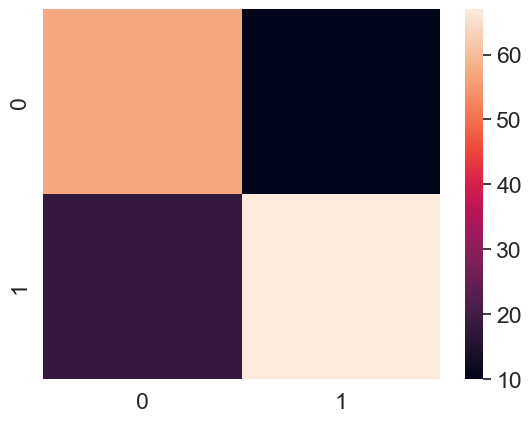

In [78]:
import seaborn as sns 

sns.set(font_scale=1.5)

conf= confusion_matrix(ytest,ypred)

sns.heatmap(conf)

In [101]:
def plot(conf):
    fig,ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(conf,
                  annot=True,
                  cbar=True)
    
    plt.xlabel("True label")
    plt.ylabel("predicted label")

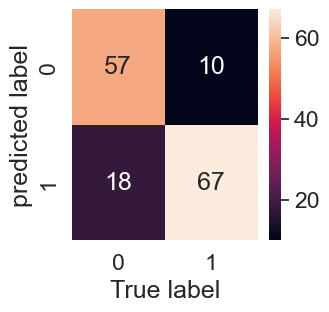

In [102]:
plot(conf)

In [103]:
rand=np.random.randint(50,size=(10,10))

In [104]:
test1=pd.DataFrame(rand)

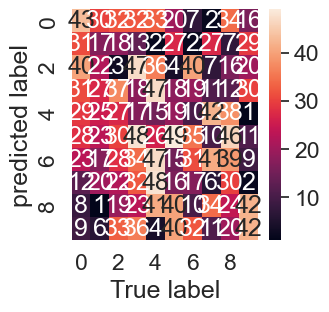

In [105]:
plot(test1)

### classification report 

In [106]:
from sklearn.metrics import classification_report 

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.85      0.80        67
           1       0.87      0.79      0.83        85

    accuracy                           0.82       152
   macro avg       0.82      0.82      0.81       152
weighted avg       0.82      0.82      0.82       152

